<a href="https://colab.research.google.com/github/offsuijn/do-it-DeepLearning/blob/main/Ch03_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03 머신러닝의 기초를 다집니다

## 03-1 선형 회귀에 대해 알아봅니다

사이킷런의 당뇨병 환자 데이터 세트 사용

In [133]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [134]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [135]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [136]:
diabetes.target[:3]

array([151.,  75., 141.])

In [137]:
import matplotlib.pyplot as plt

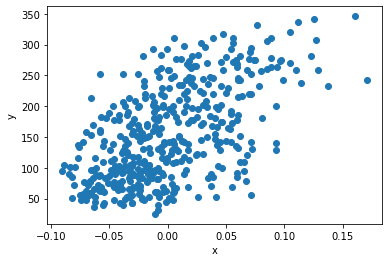

In [138]:
plt.scatter(diabetes.data[:,2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

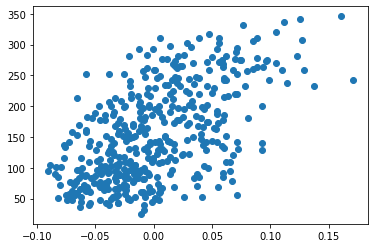

In [139]:
x = diabetes.data[:,2]
y = diabetes.target
plt.scatter(x, y)
plt.show()

In [140]:
x = diabetes.data[:, 2]
y = diabetes.target

<퀴즈> 슬라이싱을 사용해 훈련 데이터 x에서 100번째 부터 109번째 까지 샘플을 출력해 보세요. 슬라이싱한 배열의 크기는 얼마인가요?

In [141]:
x_sample = x[99:109]
print(x_sample, x_sample.shape)

[-0.06440781  0.01750591 -0.04500719  0.02828403  0.04121778  0.06492964
 -0.03207344 -0.07626374  0.04984027  0.04552903] (10,)


## 03-2 경사 하강법에 대해 알아봅니다

### 변화율로 가중치 업데이트하기

In [142]:
w = 1.0
b = 1.0

In [143]:
y_hat = x[0] * w + b
print(y_hat)

1.0616962065186886


In [144]:
print(y[0])

151.0


In [145]:
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705574


In [146]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.061696206518688734


In [147]:
print(x[0])

0.0616962065186885


In [148]:
w_new = w + w_rate
print(w_new)

1.0616962065186888


### 변화율로 절편 업데이트하기

In [149]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

1.1616962065186887


In [150]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.0


In [151]:
b_new = b + 1.0
print(b_new)

2.0


### [Backpropagation] 오차 역전파로 가중치와 절편을 더 적절하게 업데이트하기

오차와 변화율을 곱하여 규칙을 업데이트한다.
-> 오차가 큰 경우 규칙을 크게 변경할 수 있고, 예측값이 타겟보다 커질 경우 방향을 바꿀 수 있다.

In [152]:
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [174]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.122032764040299 75.7274477824319


In [176]:
w = 1.0
b = 1.0
for x_i, y_i in zip(x, y):
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i
  w = w + w_rate * err
  b = b + 1 * err
print(w, b)

587.8654539985689 99.40935564531424


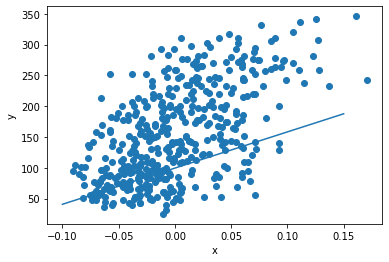

In [177]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

학습 100번 반복하여 더 정확한 직선 찾기 </br>
epoch = 100

In [178]:
for i in range(100):
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

913.5973364345905 123.39414383177204


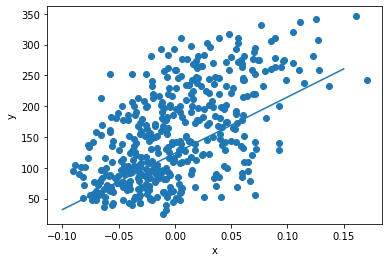

In [179]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 머신러닝 모델 찾음!
ŷ = 913.6𝔁 + 123.4

### 모델로 예측하기

In [180]:
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643899983


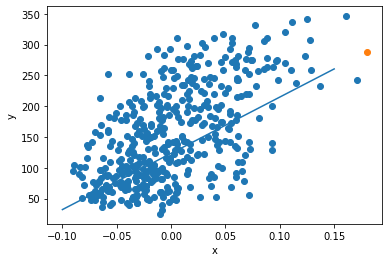

In [182]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 03-4 뉴런을 만들어봅니다

In [ ]:
class Neuron:

  def __init__(self):
    self.w = 1.0    # 가중치 초기화
    self.b = 1.0    # 절편 초기화 

  def forpass(self, x):
    y_hat = x * self.w + self.b   # 직선 방정식 계산
    return y_hat

  def backprop(self, x, err):
    w_grad = x * err    # 가중치에 대한 gradient 계산
    b_grad = 1 * err    # 절편에 대한 gradient 계산
    return w_grad, b_grad


  def fit(self, x, y, epochs=100):
    for i in range(epochs):   # epoch만큼 반복
      for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복
        y_hat = self.forpass(x_i, y_i)    # 정방향 계산
        err = -(y_i - y_hat)    # 오차 계산
        w_grad, b_grad = self.backprop(x_i, err)    # 역방향 계산
        self.w -= w_grad    # 가중치 업데이트
        self.b -= + b_grad    # 절편 업데이트


In [183]:
neuron = Neuron()
neuron.fit(x, y)

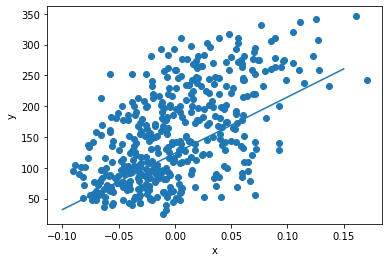

In [185]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()